In [38]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import sys
import matplotlib.pyplot as plt
import shap
import plotly.express as px

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_curve, auc, recall_score
from sklearn.metrics import precision_score
import xgboost as xgb
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix  
import glob
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE


In [3]:
def string_to_float(string):
    return float(string.strip('[]'))


In [4]:
#tracce verticali a 20 GeV
file_list_e = ['/lustrehome/mbossa/Nuses/Analysis/e-Mono_20GeV_onAxis_20000_evts/NUSES_wt_CaloHERDe-Mono_20000-0.25_onAxis_20000-evt-0', '/lustrehome/mbossa/Nuses/Analysis/e-Mono_20GeV_onAxis_20000_evts/NUSES_wt_CaloHERDe-Mono_20000-0.25_onAxis_20000-evt-1', '/lustrehome/mbossa/Nuses/Analysis/e-Mono_20GeV_onAxis_20000_evts/NUSES_wt_CaloHERDe-Mono_20000-0.25_onAxis_20000-evt-2', '/lustrehome/mbossa/Nuses/Analysis/e-Mono_20GeV_onAxis_20000_evts/NUSES_wt_CaloHERDe-Mono_20000-0.25_onAxis_20000-evt-3', '/lustrehome/mbossa/Nuses/Analysis/e-Mono_20GeV_onAxis_20000_evts/NUSES_wt_CaloHERDe-Mono_20000-0.25_onAxis_20000-evt-4']
file_list_p = ['/lustrehome/mbossa/Nuses/Analysis/protonMono_20GeV_onAxis_20000_evts/NUSES_wt_CaloHERDprotonMono_20000-0.25_onAxis_20000-evt-0', '/lustrehome/mbossa/Nuses/Analysis/protonMono_20GeV_onAxis_20000_evts/NUSES_wt_CaloHERDprotonMono_20000-0.25_onAxis_20000-evt-1', '/lustrehome/mbossa/Nuses/Analysis/protonMono_20GeV_onAxis_20000_evts/NUSES_wt_CaloHERDprotonMono_20000-0.25_onAxis_20000-evt-3', '/lustrehome/mbossa/Nuses/Analysis/protonMono_20GeV_onAxis_20000_evts/NUSES_wt_CaloHERDprotonMono_20000-0.25_onAxis_20000-evt-4']
file_list_pi_plus = ['/lustrehome/mbossa/Nuses/Analysis/pi+Mono_20GeV_onAxis_20000_evts/NUSES_wt_CaloHERDpi+Mono_20000-0.25_onAxis_20000-evt-0 ', '/lustrehome/mbossa/Nuses/Analysis/pi+Mono_20GeV_onAxis_20000_evts/NUSES_wt_CaloHERDpi+Mono_20000-0.25_onAxis_20000-evt-1', '/lustrehome/mbossa/Nuses/Analysis/pi+Mono_20GeV_onAxis_20000_evts/NUSES_wt_CaloHERDpi+Mono_20000-0.25_onAxis_20000-evt-2', '/lustrehome/mbossa/Nuses/Analysis/pi+Mono_20GeV_onAxis_20000_evts/NUSES_wt_CaloHERDpi+Mono_20000-0.25_onAxis_20000-evt-3', '/lustrehome/mbossa/Nuses/Analysis/pi+Mono_20GeV_onAxis_20000_evts/NUSES_wt_CaloHERDpi+Mono_20000-0.25_onAxis_20000-evt-4']

In [5]:
df_list_e = [pd.read_csv(file) for file in file_list_e]
combined_df_e = pd.concat(df_list_e, ignore_index=True)
combined_df_e.to_csv('combined_df_e.csv', index=False)

In [6]:
df_list_p = [pd.read_csv(file) for file in file_list_p]
combined_df_p = pd.concat(df_list_p, ignore_index=True)
combined_df_p.to_csv('combined_df_p.csv', index=False)

In [7]:
df_list_pi_plus = [pd.read_csv(file) for file in file_list_pi_plus]
combined_df_pi_plus = pd.concat(df_list_pi_plus, ignore_index=True)
combined_df_pi_plus.to_csv('combined_df_pi_plus.csv', index=False)

In [8]:
df_e = pd.read_csv('combined_df_e.csv')
df_p = pd.read_csv('combined_df_p.csv')
df_pi_plus = pd.read_csv('combined_df_pi_plus.csv')

In [9]:
df_e['R1'] = df_e['R1'].apply(string_to_float)
df_e['R2'] = df_e['R2'].apply(string_to_float)
df_e['R4'] = df_e['R4'].apply(string_to_float)
df_e['R5'] = df_e['R5'].apply(string_to_float)
df_e['R6'] = df_e['R6'].apply(string_to_float)

df_p['R1'] = df_p['R1'].apply(string_to_float)
df_p['R2'] = df_p['R2'].apply(string_to_float)
df_p['R4'] = df_p['R4'].apply(string_to_float)
df_p['R5'] = df_p['R5'].apply(string_to_float)
df_p['R6'] = df_p['R6'].apply(string_to_float)

df_pi_plus['R1'] = df_pi_plus['R1'].apply(string_to_float)
df_pi_plus['R2'] = df_pi_plus['R2'].apply(string_to_float)
df_pi_plus['R4'] = df_pi_plus['R4'].apply(string_to_float)
df_pi_plus['R5'] = df_pi_plus['R5'].apply(string_to_float)
df_pi_plus['R6'] = df_pi_plus['R6'].apply(string_to_float)

In [10]:
df_e['R3'] = df_e['R3'].apply(lambda x: eval(x) if isinstance(x, str) else np.nan)
df_p['R3'] = df_p['R3'].apply(lambda x: eval(x) if isinstance(x, str) else np.nan)
df_pi_plus['R3'] = df_pi_plus['R3'].apply(lambda x: eval(x) if isinstance(x, str) else np.nan)

In [11]:
for i in range(25):
        df_e[f'R3_{i+1}'] = df_e['R3'].apply(lambda x: x[i] if isinstance(x, list) and i < len(x) else 0)
df2 = df_e.drop(columns=['R3'])

In [12]:
for i in range(25):
        df_p[f'R3_{i+1}'] = df_p['R3'].apply(lambda x: x[i] if isinstance(x, list) and i < len(x) else 0)
df2_p = df_p.drop(columns=['R3'])

In [14]:
for i in range(25):
        df_pi_plus[f'R3_{i+1}'] = df_pi_plus['R3'].apply(lambda x: x[i] if isinstance(x, list) and i < len(x) else 0)
df2_pi_plus = df_pi_plus.drop(columns=['R3'])

In [15]:
df2['y_true'] = 0
df2_p['y_true'] = 1
df2_pi_plus['y_true']= 2

In [16]:
#combined_df = pd.concat([df2, df2_p])
combined_df = pd.concat([df2, df2_p, df2_pi_plus])
shuffled_df = combined_df.sample(frac=1).reset_index(drop=True)
y_true = shuffled_df['y_true'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(shuffled_df.iloc[:, 1:-1], shuffled_df.iloc[:, -1], test_size=0.3, random_state=0)

In [18]:
X_tsne_df = pd.DataFrame(X_test)  # Assicurati che X_val sia un DataFrame
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_tsne_df)

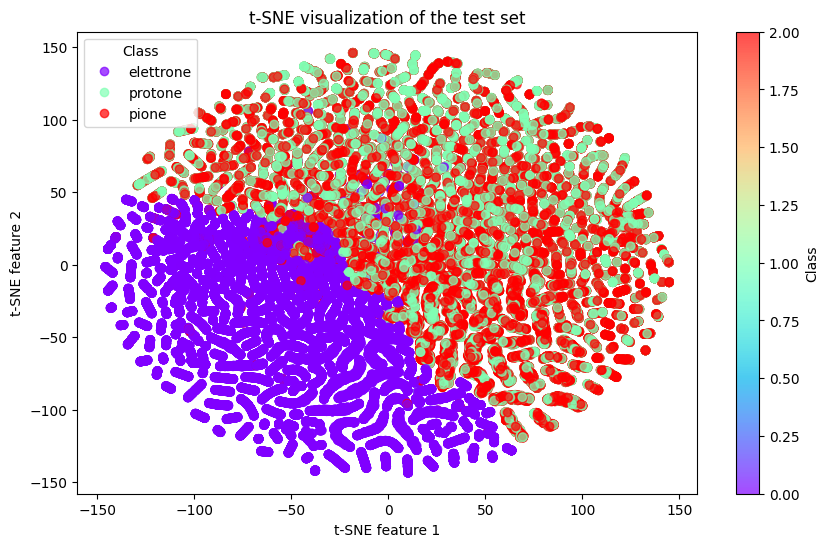

In [19]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:,2], c=y_test, cmap='rainbow', alpha=0.7)
label_mapping = {0: 'elettrone', 1: 'protone', 2: 'pione'}
handles, _ = scatter.legend_elements()
legend_labels = [label_mapping[int(label)] for label in np.unique(y_test)]
plt.legend(handles, legend_labels, title="Class")

plt.colorbar(scatter, label='Class')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('t-SNE visualization of the test set')
#0 elettrone
#1 protone
#2 pi+
plt.savefig('TSNE_3classes_20GeV_onAxis.png')

In [20]:
X_tsne_df = pd.DataFrame(X_test)  
tsne = TSNE(n_components=3, random_state=0)
X_tsne = tsne.fit_transform(X_tsne_df)

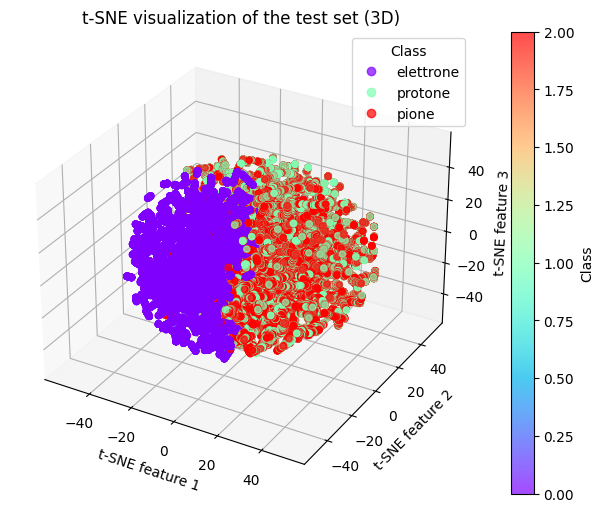

In [21]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y_test, cmap='rainbow', alpha=0.7)

label_mapping = {0: 'elettrone', 1: 'protone', 2: 'pione'}
handles, _ = scatter.legend_elements()
legend_labels = [label_mapping[int(label)] for label in np.unique(y_test)]
legend = ax.legend(handles, legend_labels, title="Class")

fig.colorbar(scatter, ax=ax, label='Class')
ax.set_xlabel('t-SNE feature 1')
ax.set_ylabel('t-SNE feature 2')
ax.set_zlabel('t-SNE feature 3')
ax.set_title('t-SNE visualization of the test set (3D)')
plt.savefig('TSNE_3classes_20GeV_onAxis_3D.png')